## <center> Customizing Plot Legends </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from analysis_tools.display import Display
plt.style.use('seaborn-v0_8-white')

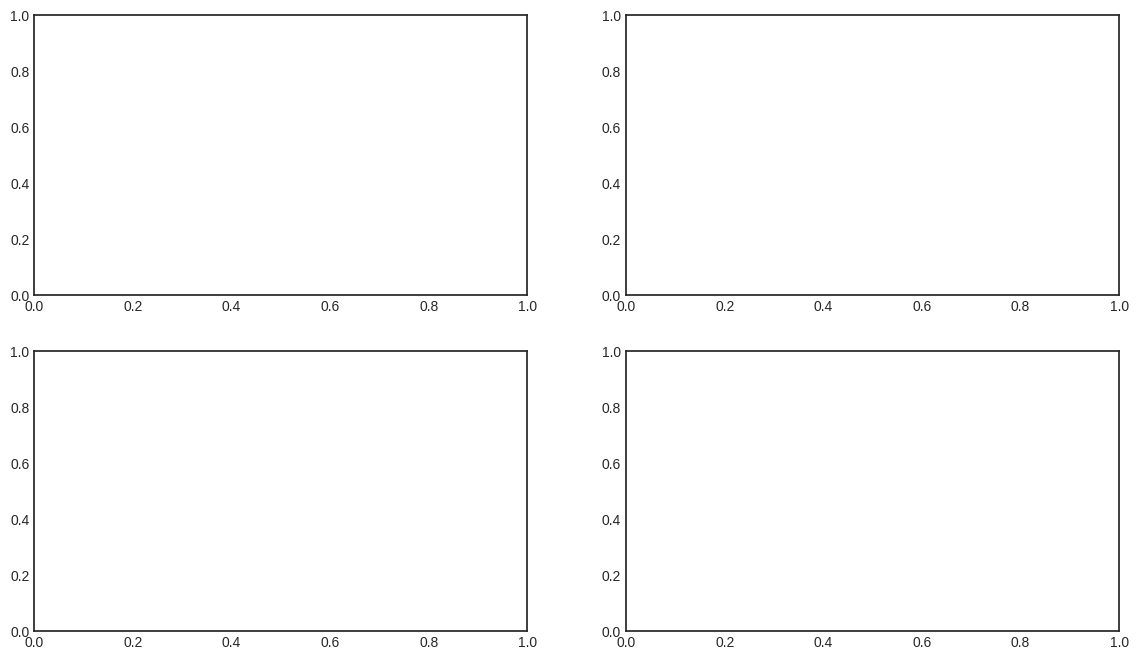

In [2]:
x = np.linspace(0, 10, 1000)
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(14,8));

In [3]:
for i in np.arange(1,5):
    axes = pd.eval('ax'+str(i))
    axes.plot(x, np.sin(x), '-b', label='sine')
    axes.plot(x, np.cos(x), '--r', label='cosine')
    axes.axis('equal')
    
ax1.legend()
ax2.legend(loc='upper left', frameon=True)
ax3.legend(loc='lower center', ncol=2)
ax4.legend(loc='upper left', frameon=True, fancybox=True, framealpha=1, shadow=True, borderpad=1)

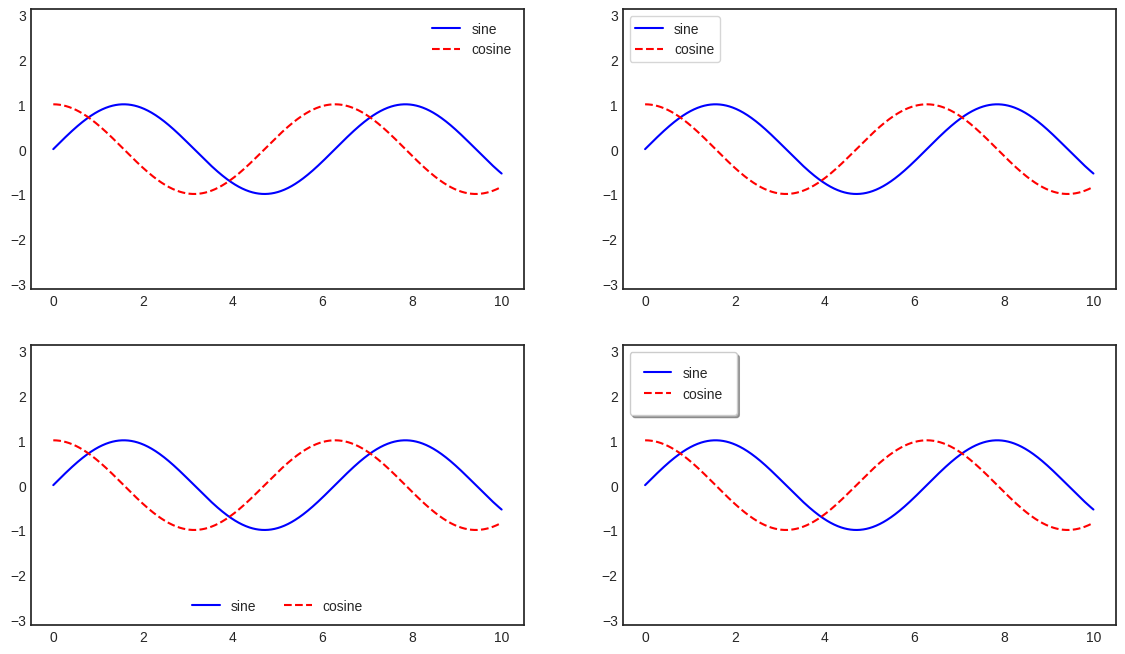

In [4]:
fig

In [5]:
fig.clear()

> ### Choosing Elements For The Legend
`plt.plot` give you the `Line2D` elements which you can pass into legend.
Although `plt.legend` only picks lines with labels, this method makes your work clearer.

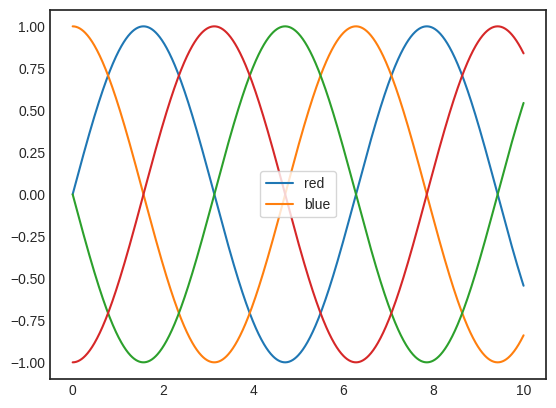

In [6]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y);
plt.legend(lines[:2], ['red', 'blue'], loc='center', frameon=True)

### <center>Legend for Size of Points

In [7]:
url = ('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/''master/notebooks_v1/data/california_cities.csv')
!cd ../data && curl -O {url}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: raw.githubusercontent.com


In [8]:
cities=pd.read_csv('../data/california_cities.csv')
cities.head(5)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [9]:
# Extract required data
lat, long = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

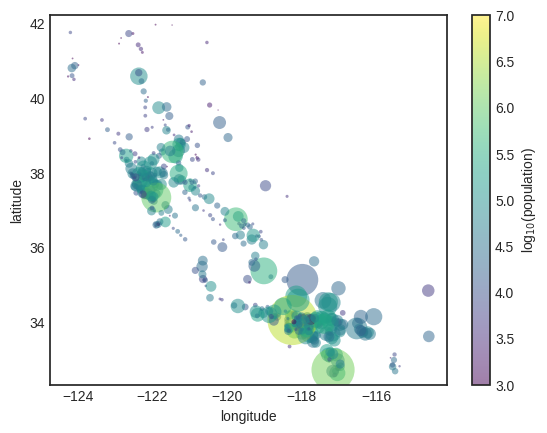

In [10]:
fig2, ax2 = plt.subplots()

# Scatter the points, using size and color, but no label
scatter = ax2.scatter(long, lat, label=None, c=np.log10(population), 
                     cmap='viridis', s=area, 
                     linewidth=0, alpha=0.5)
scatter.set_clim(3, 7)
ax2.axis('equal')
ax2.set_xlabel('longitude')
ax2.set_ylabel('latitude')
cbar = fig2.colorbar(scatter, ax=ax2, label='log$_{10}$(population)')


---

> #### Below we create an empty scatter plot for our legend
> - By plotting empty lists, we can create labeled plot objects that are picked up by the legend,
now our legend tells us some useful information. This strategy can be useful for creating more sophisticated visualizations.

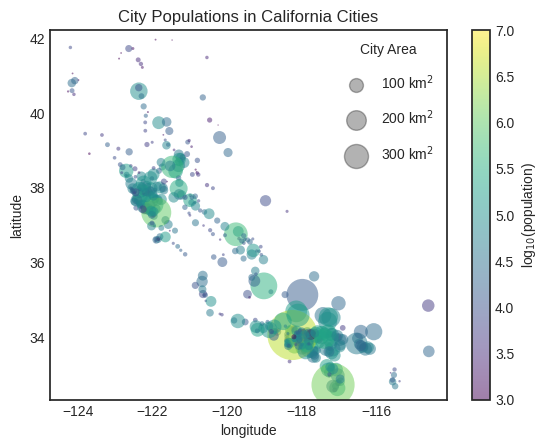

In [11]:

for area in [100, 200, 300]:
    ax2.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + ' km$^2$')
ax2.legend(scatterpoints=1, frameon=False, labelspacing=1.2, title='City Area')
ax2.set_title('City Populations in California Cities')
# call the figure
fig2

---

### <center>Multiple Legends

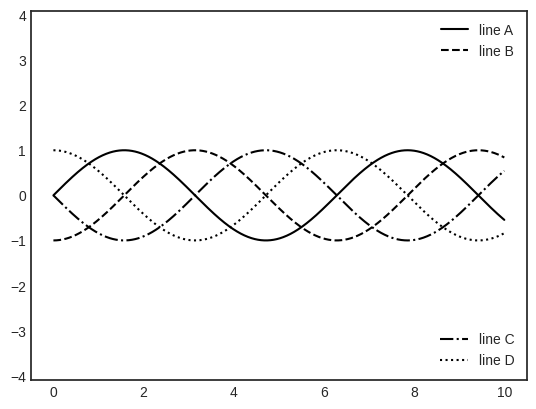

In [12]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)
for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color='black')
ax.axis('equal')

# Specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'], loc='upper right')

# Create the second legend and add the artist manually
from matplotlib.legend import Legend
legend = Legend(ax, lines[2:], ['line C', 'line D'], loc='lower right')
ax.add_artist(legend)

### <center> Customizing Colorbars

> Using the `colorbar()` function

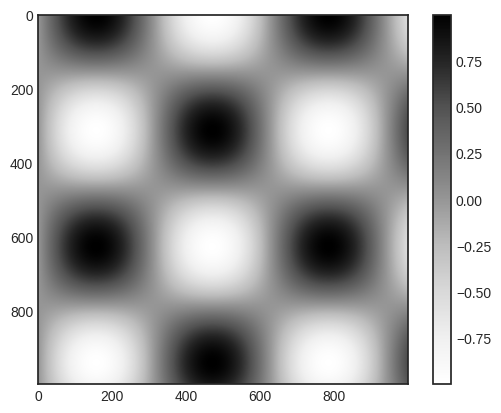

In [109]:
x = np.linspace(0,10,1000)
I = np.sin(x)*np.cos(x[:,np.newaxis])
plt.imshow(I)
# plt.imshow(x, cmap='Blues')
# plt.cm.<TAB> : gives the available colormaps in the plt.cm namespace

plt.colorbar();


### <center>Color Limits and Extensions:
> The colorbar has some interesting flexibility : we
can narrow the color limits and indicate the out-of-bounds values by setting the `extend` property. This might come in
handy when displaying an image subject to noise

In [39]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

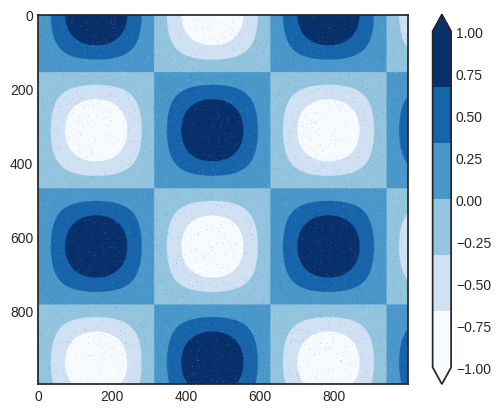

In [38]:
plt.imshow(I, cmap=plt.get_cmap('Blues', 6)) #plt.cm.get_cmap : deprecated
plt.colorbar(extend='both')
plt.clim(-1, 1);

> The discrete version of a colormap can be used just like any other colormap.
---

>#### Handwritten Digits Example

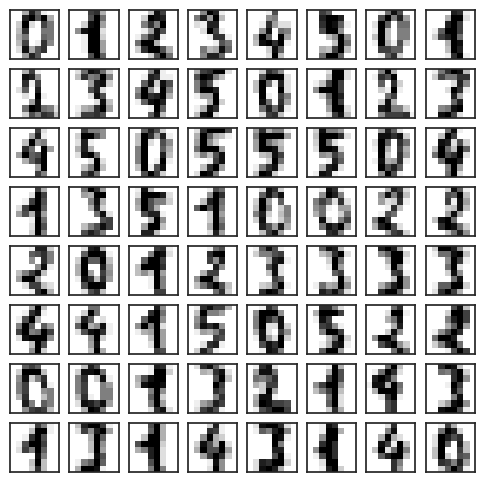

In [114]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits()
digits = load_digits(n_class=6)
fig, ax = plt.subplots(8,8, figsize=(6,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [116]:
for i, axi in enumerate(ax.flat):
    print(i,axi)



0 Axes(0.125266,0.798085;0.0819149x0.0819149)
1 Axes(0.224202,0.798085;0.0819149x0.0819149)
2 Axes(0.323138,0.798085;0.0819149x0.0819149)
3 Axes(0.422074,0.798085;0.0819149x0.0819149)
4 Axes(0.521011,0.798085;0.0819149x0.0819149)
5 Axes(0.619947,0.798085;0.0819149x0.0819149)
6 Axes(0.718883,0.798085;0.0819149x0.0819149)
7 Axes(0.817819,0.798085;0.0819149x0.0819149)
8 Axes(0.125266,0.699787;0.0819149x0.0819149)
9 Axes(0.224202,0.699787;0.0819149x0.0819149)
10 Axes(0.323138,0.699787;0.0819149x0.0819149)
11 Axes(0.422074,0.699787;0.0819149x0.0819149)
12 Axes(0.521011,0.699787;0.0819149x0.0819149)
13 Axes(0.619947,0.699787;0.0819149x0.0819149)
14 Axes(0.718883,0.699787;0.0819149x0.0819149)
15 Axes(0.817819,0.699787;0.0819149x0.0819149)
16 Axes(0.125266,0.601489;0.0819149x0.0819149)
17 Axes(0.224202,0.601489;0.0819149x0.0819149)
18 Axes(0.323138,0.601489;0.0819149x0.0819149)
19 Axes(0.422074,0.601489;0.0819149x0.0819149)
20 Axes(0.521011,0.601489;0.0819149x0.0819149)
21 Axes(0.619947,0.6014